# The Sparks Foundation
### GRIP Septemer 2021 Batch 
### Author: Teghpreet Singh Mago
### Task 2 : Color Identification in Images

### 1. Problem defintion
Implement an image color detector which identifies all the colors in an image or video.
### 2. Libraries and Features 
For this project, We need sklearn for KMeans algorithm, matplotlib.pyplot for plotting graphs, numpy to work with arrays, cv2 to work with image data, collections to use Counter to count values, rgb2lab to convert RGB values and deltaE_cie76 to calculate similarity between colors

### Importing Libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

### Working with OpenCV

Enter Valid Image Location italy.jpg
The type of this input is <class 'numpy.ndarray'>
Shape: (625, 940, 3)


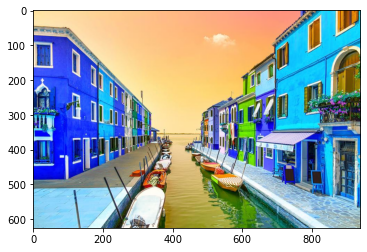

In [34]:
location = input('Enter Valid Image Location ')
image = cv2.imread(location)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

Note that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. Thus, we need to convert it into REG GREEN BLUE i.e. RGB.

### Restoring the Original colours of the image

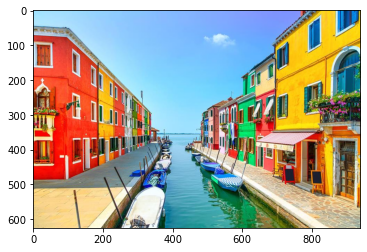

In [35]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

### Converting the image into grayscale (black and white)

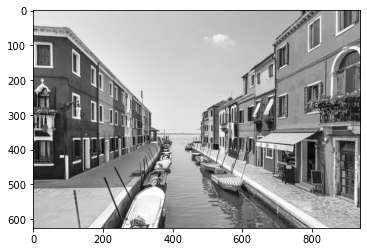

In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

### Resizing the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions.

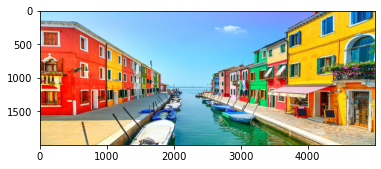

In [17]:
resized_image = cv2.resize(image, (5000, 2000))
plt.imshow(resized_image)

In [18]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [19]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [36]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    center_colors = clf.cluster_centers_
    
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8,8))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.title('Distribution of different colours for a given image', fontsize=20)
        plt.legend(loc='best')
        plt.show()
    
    return rgb_colors

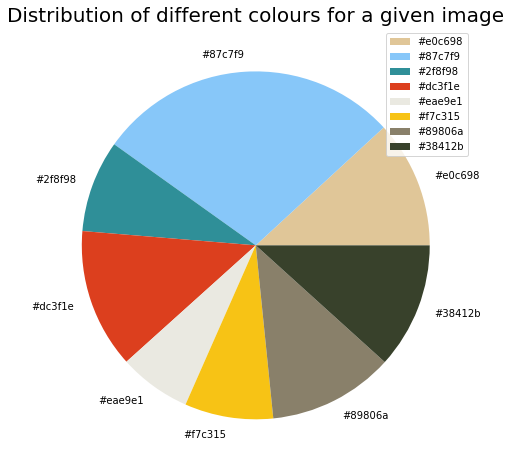

[array([224.66695964, 198.22809731, 152.07548165]),
 array([135.0129763 , 199.38718277, 249.0035497 ]),
 array([ 47.0185104 , 143.25695358, 152.37459204]),
 array([220.65168106,  63.35480556,  30.76847243]),
 array([234.52192765, 233.55265114, 225.48024034]),
 array([247.00942727, 195.16254435,  21.16964014]),
 array([137.30439588, 128.50187172, 106.43106706]),
 array([56.0042394 , 65.22757392, 43.26056288])]

In [37]:
get_colors(get_image(location), 8, True)

In [87]:
IMAGE_DIRECTORY = input('Enter Folder name where images are stored ')
COLORS = {'GREEN': [0, 128, 0],'BLUE': [0, 0, 128],'YELLOW': [255, 255, 0], 'RED': [255,0,0]}
nature = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        nature.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

Enter Folder name where images are stored nature


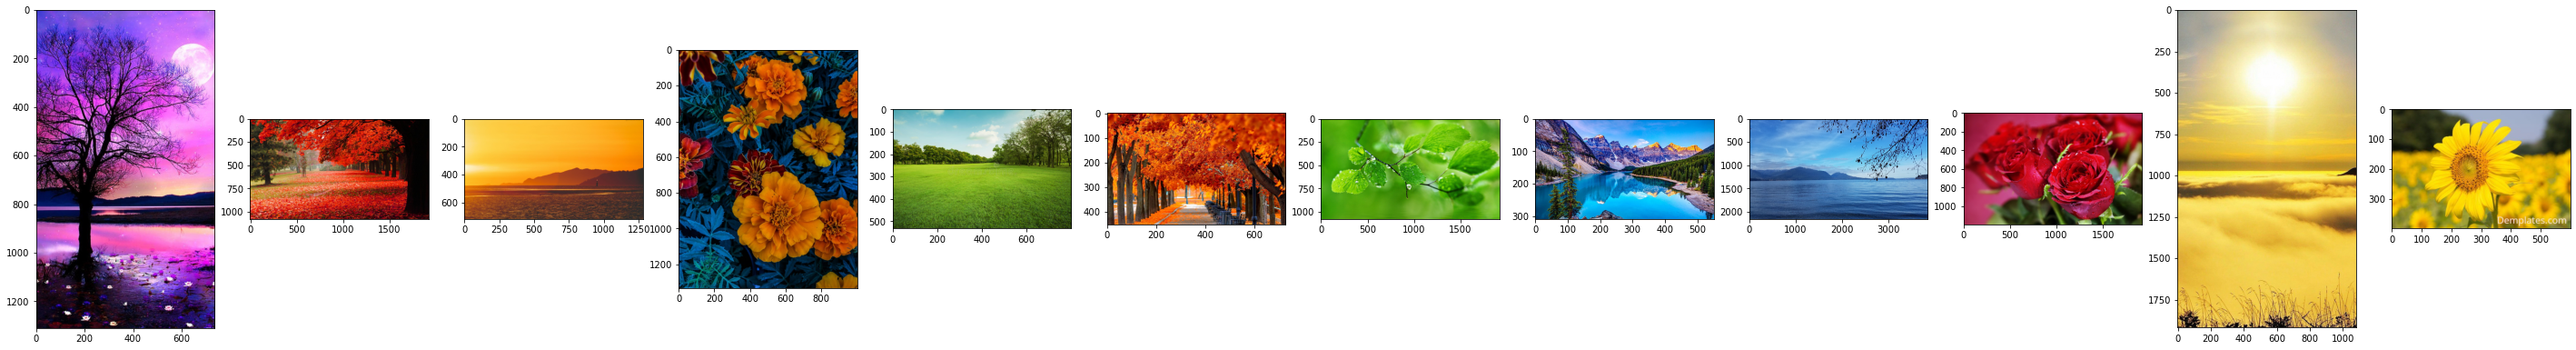

In [90]:
plt.figure(figsize=(50, 100))
for i in range(len(nature)):
    plt.subplot(1, len(nature), i+1)
    plt.imshow(nature[i])

In [91]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [92]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i], color, threshold, colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

### Searching for Images with Green colour

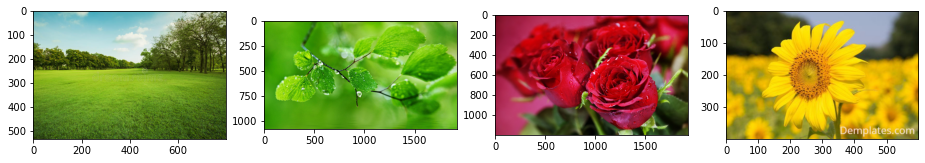

In [99]:
plt.figure(figsize = (20, 10))
show_selected_images(nature, COLORS['GREEN'], 60, 5)

### Searching for Images with Red colour

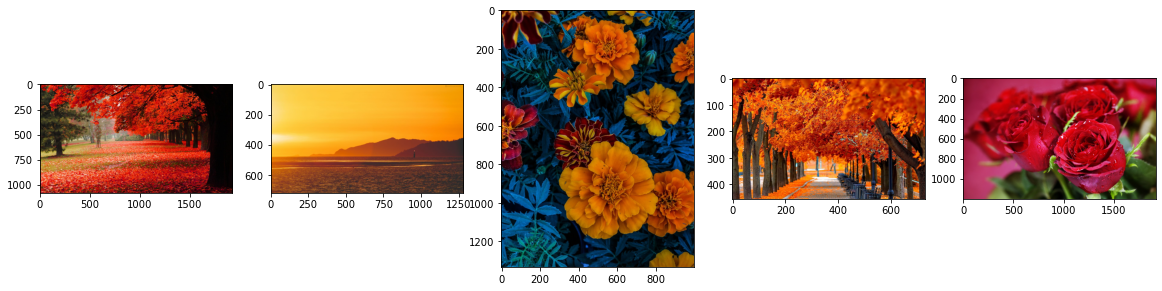

In [96]:
plt.figure(figsize = (20, 10))
show_selected_images(nature, COLORS['RED'], 60, 5)

### Searching for Images with Blue colour

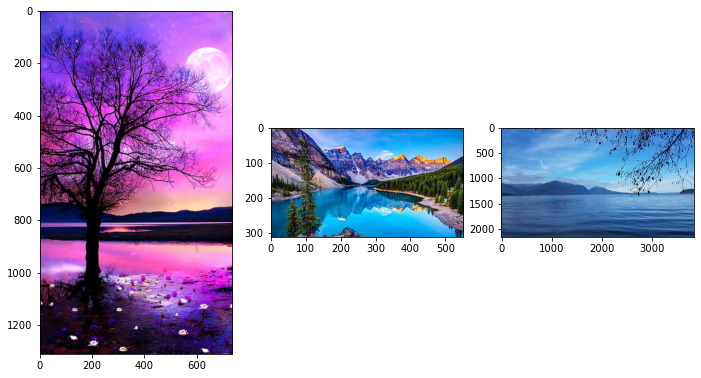

In [97]:
plt.figure(figsize = (20, 10))
show_selected_images(nature, COLORS['BLUE'], 60, 5)

### Searching for Images with Yellow colour

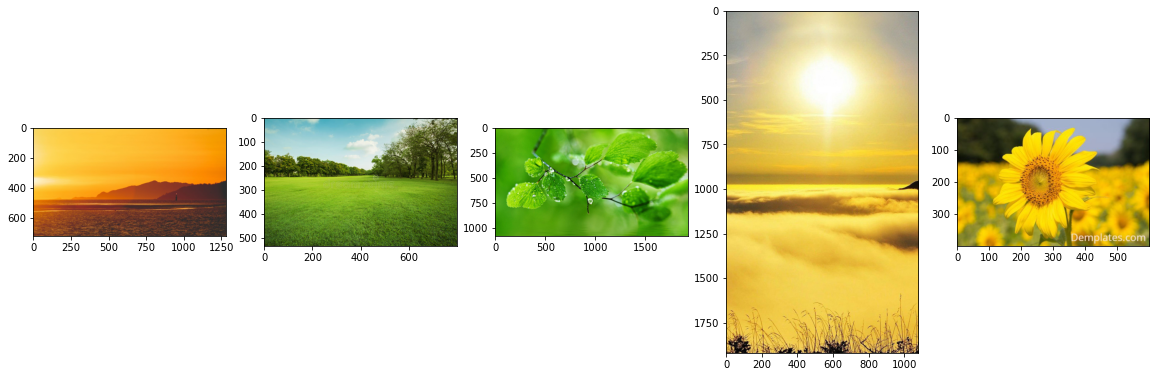

In [98]:
plt.figure(figsize = (20, 10))
show_selected_images(nature, COLORS['YELLOW'], 60, 5)

### Conclusions and Results

Using this application, one can input a valid location of an image and obtain the image in different filters.(The image location that we entered here was italy.jpg)

The application can also be used to plot the colours in an image into a pie chart with different colours plotted against their standard colour codes. 

Using this application, one can also input a valid location of an image folder and classify different images by colour.(The image folder that we entered here was nature)

To classify images based on their colours, we have created a dictionary COLORS and used the hexcodes of four basic/primary colurs: RED, BLUE, GREEN, YELLOW. We can also use other secondary colours by extracting their hexcodes. 